In [11]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
# from sklearn.neural_network import MPLClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
# from sklearn.model_selection import train_test_split
# %matplotlib inlines

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
wine= pd.read_csv("WineQT.csv")
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [14]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [15]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [16]:
# preprocessing
bins=(2,6,8)
group_names=['bad','good']
wine['quality']=pd.cut(wine['quality'], bins=bins,labels=group_names)
wine["quality"].unique()



['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [17]:
label_quality=LabelEncoder()


In [18]:
wine["quality"]=label_quality.fit_transform(wine['quality'])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,4


In [19]:
wine['quality'].value_counts()

0    984
1    159
Name: quality, dtype: int64

C:\Users\Bishnu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

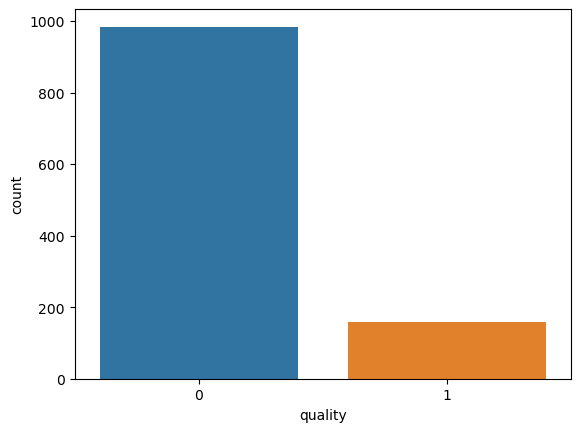

In [22]:
sns.countplot(wine["quality"])

In [23]:
x=wine.drop('quality',axis=1)
y=wine['quality']

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) 

In [26]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [28]:
x_train[:5]

array([[ 0.1426802 , -1.40273053,  1.5096933 , -0.55102394,  0.11651554,
         1.88559834,  1.79122276,  0.11355786, -0.09314751,  0.56821234,
         0.05661327, -1.72103768],
       [ 0.96843134, -1.17920341,  1.5096933 , -0.39776844, -0.28423884,
        -1.24188154, -1.18572018, -0.7017669 , -1.07474038,  0.4477703 ,
         0.89445566,  0.56050423],
       [ 0.3786091 , -1.23508519,  0.4833938 ,  0.06199805, -0.64280855,
        -0.55774532, -0.21429669, -0.55542656,  0.56124774,  0.20688622,
         1.26683005,  0.18168217],
       [-0.97798208,  1.95017634, -1.1586854 , -0.24451294, -0.43188519,
        -0.36227782, -0.80968528, -0.16866994,  1.41196156, -0.57598704,
        -0.50194833,  1.59365528],
       [-0.38815983, -0.6203856 , -0.08107092,  1.0581588 ,  0.36962357,
         1.20146211,  1.38385162,  0.6048433 , -1.07474038, -0.51576602,
        -1.24669712,  0.51960867]])

In [29]:
x_test[:4]

array([[-0.86001763,  0.44136825, -1.1586854 , -0.78090719, -0.62171622,
        -1.04641405, -1.1230477 , -0.74880486,  0.69212679, -0.33510296,
        -0.87432272, -1.27764369],
       [-0.8010354 ,  1.72664922, -0.28633082,  1.2114143 , -0.26314651,
         0.02865716,  0.60044559,  0.90797686,  1.41196156,  0.38754928,
        -1.12257232,  1.50325456],
       [-0.74205318,  0.2737229 , -0.7481656 , -0.47439619,  0.0954232 ,
         1.78786459,  2.44928384, -0.56587944,  0.82300584, -1.0577552 ,
         0.05661327, -0.85792607],
       [-0.27019538, -0.28509491,  2.125473  , -0.62765169,  6.92934003,
        -0.16681033, -0.43365038, -0.06414112, -1.46737753,  2.43506395,
        -1.24669712, -0.13256794]])

##### Random forest classifier


In [32]:
rfc=RandomForestClassifier(n_estimators=20)
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
pred_rfc[:20] #for first 20 var

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [34]:
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       201
           1       0.70      0.57      0.63        28

    accuracy                           0.92       229
   macro avg       0.82      0.77      0.79       229
weighted avg       0.91      0.92      0.91       229

[[194   7]
 [ 12  16]]


In [36]:
clf=svm.SVC()
clf.fit(x_train,y_train)
pred_clf=clf.predict(x_test)


In [37]:
print(classification_report(y_test,pred_clf))
print(confusion_matrix(y_test,pred_clf))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       201
           1       0.69      0.32      0.44        28

    accuracy                           0.90       229
   macro avg       0.80      0.65      0.69       229
weighted avg       0.89      0.90      0.88       229

[[197   4]
 [ 19   9]]


##### NEURAL NETWORK SYNTAX
 mlpc=mlpClassifier(hidden_layer_sizes=(11,11,11),max_itr=500
 mlpc.fit(x_train,y_train)
 pred_mlpc=mlpc.predic(x_test)
 

In [40]:
from sklearn.metrics import accuracy_score
cm=accuracy_score(y_test,pred_clf)
cm

0.8995633187772926